Importing all the modules

In [30]:
import datetime as dt
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data
import matplotlib.pyplot as pt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure


Specifying the Date

In [31]:
end = dt.date.today()
start = dt.datetime(end.year,end.month-1,end.day-1)

Collecting the Data set

In [32]:
com_df1 = pd.DataFrame(data.DataReader('BSE/BOM500180', 'quandl', start=start, end=end )['Close'])    #HDFC_Bank

In [33]:
com_df2 = pd.DataFrame(data.DataReader('BSE/BOM500247', 'quandl', start=start, end=end )['Close'])    #Kotak_Mahindra

In [34]:
com_df3 = pd.DataFrame(data.DataReader('BSE/BOM532174', 'quandl', start=start, end=end )['Close'])    #ICICI_Bank

In [35]:
com_df4 = pd.DataFrame(data.DataReader('BSE/BOM532215', 'quandl', start=start, end=end )['Close'])    #Axis_Bank

In [36]:
com_df5 = pd.DataFrame(data.DataReader('BSE/BOM532187', 'quandl', start=start, end=end )['Close'])    #Indusind_Bank

Renaming the close columns

In [37]:
HDFC_Bank = com_df1.rename(columns={'Close':'HDFC_Bank'})
Kotak_Mahindra = com_df2.rename(columns={'Close':'Kotak_Mahindra'})
ICICI_Bank = com_df3.rename(columns={'Close':'ICICI_Bank'})
AXIS_Bank = com_df4.rename(columns={'Close':'AXIS_Bank'})
Indusind_Bank = com_df5.rename(columns={'Close':'Indusind_Bank'})

Joinig all the data frames

In [38]:
close_df = (((HDFC_Bank.join(Kotak_Mahindra, how="outer")).join(ICICI_Bank, how="outer")).join(AXIS_Bank, how="outer")).join(Indusind_Bank,how="outer")

In [39]:
close_df

,HDFC_Bank,Kotak_Mahindra,ICICI_Bank,AXIS_Bank,Indusind_Bank
Date,,,,,
2018-07-30,2172.25,1304.65,307.25,568.45,1966.00
2018-07-27,2203.40,1311.00,293.30,553.65,1975.80
2018-07-26,2189.35,1309.60,285.80,541.65,1957.00
2018-07-25,2173.70,1314.80,274.60,531.85,1965.45
2018-07-24,2160.60,1313.35,274.50,546.00,1946.90
2018-07-23,2157.75,1336.20,274.85,540.80,1938.90
2018-07-20,2190.10,1333.45,266.00,534.45,1902.30
2018-07-19,2185.70,1350.25,261.20,527.30,1889.05
2018-07-18,2176.05,1402.05,262.60,524.20,1892.35


In [40]:
import seaborn as sns
sns.set_style('whitegrid')

In [41]:
rets = close_df.pct_change()                                    #returns -- one day percent change for each of the stocks
rets.head()

,HDFC_Bank,Kotak_Mahindra,ICICI_Bank,AXIS_Bank,Indusind_Bank
Date,,,,,
2018-07-30,NaN,NaN,NaN,NaN,NaN
2018-07-27,0.014340,0.004867,-0.045403,-0.026036,0.004985
2018-07-26,-0.006377,-0.001068,-0.025571,-0.021674,-0.009515
2018-07-25,-0.007148,0.003971,-0.039188,-0.018093,0.004318
2018-07-24,-0.006027,-0.001103,-0.000364,0.026605,-0.009438


# Pair Plotting

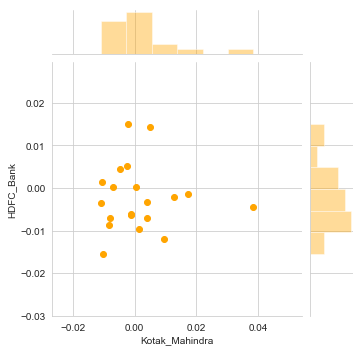

In [42]:
sns.jointplot('Kotak_Mahindra','HDFC_Bank',rets, kind='scatter',height=5, color='orange')

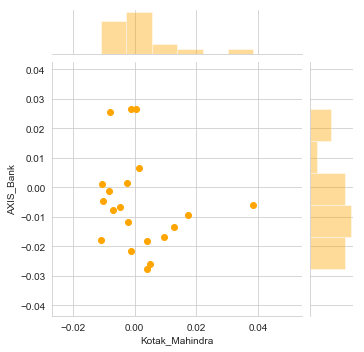

In [43]:
sns.jointplot('Kotak_Mahindra','AXIS_Bank',rets, kind='scatter',height=5, color='orange')

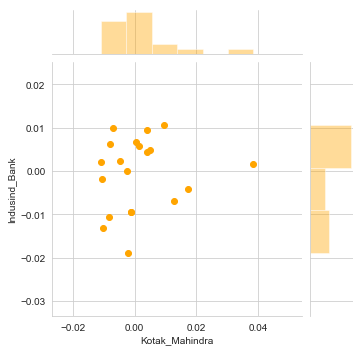

In [44]:
sns.jointplot('Kotak_Mahindra','Indusind_Bank',rets, kind='scatter',height=5, color='orange')

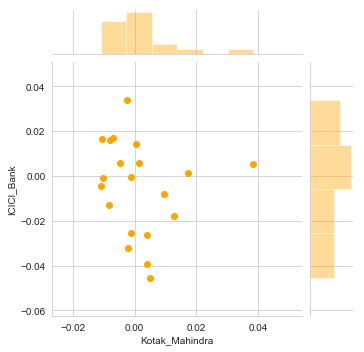

In [45]:
sns.jointplot('Kotak_Mahindra','ICICI_Bank',rets, kind='scatter',height=5, color='orange')

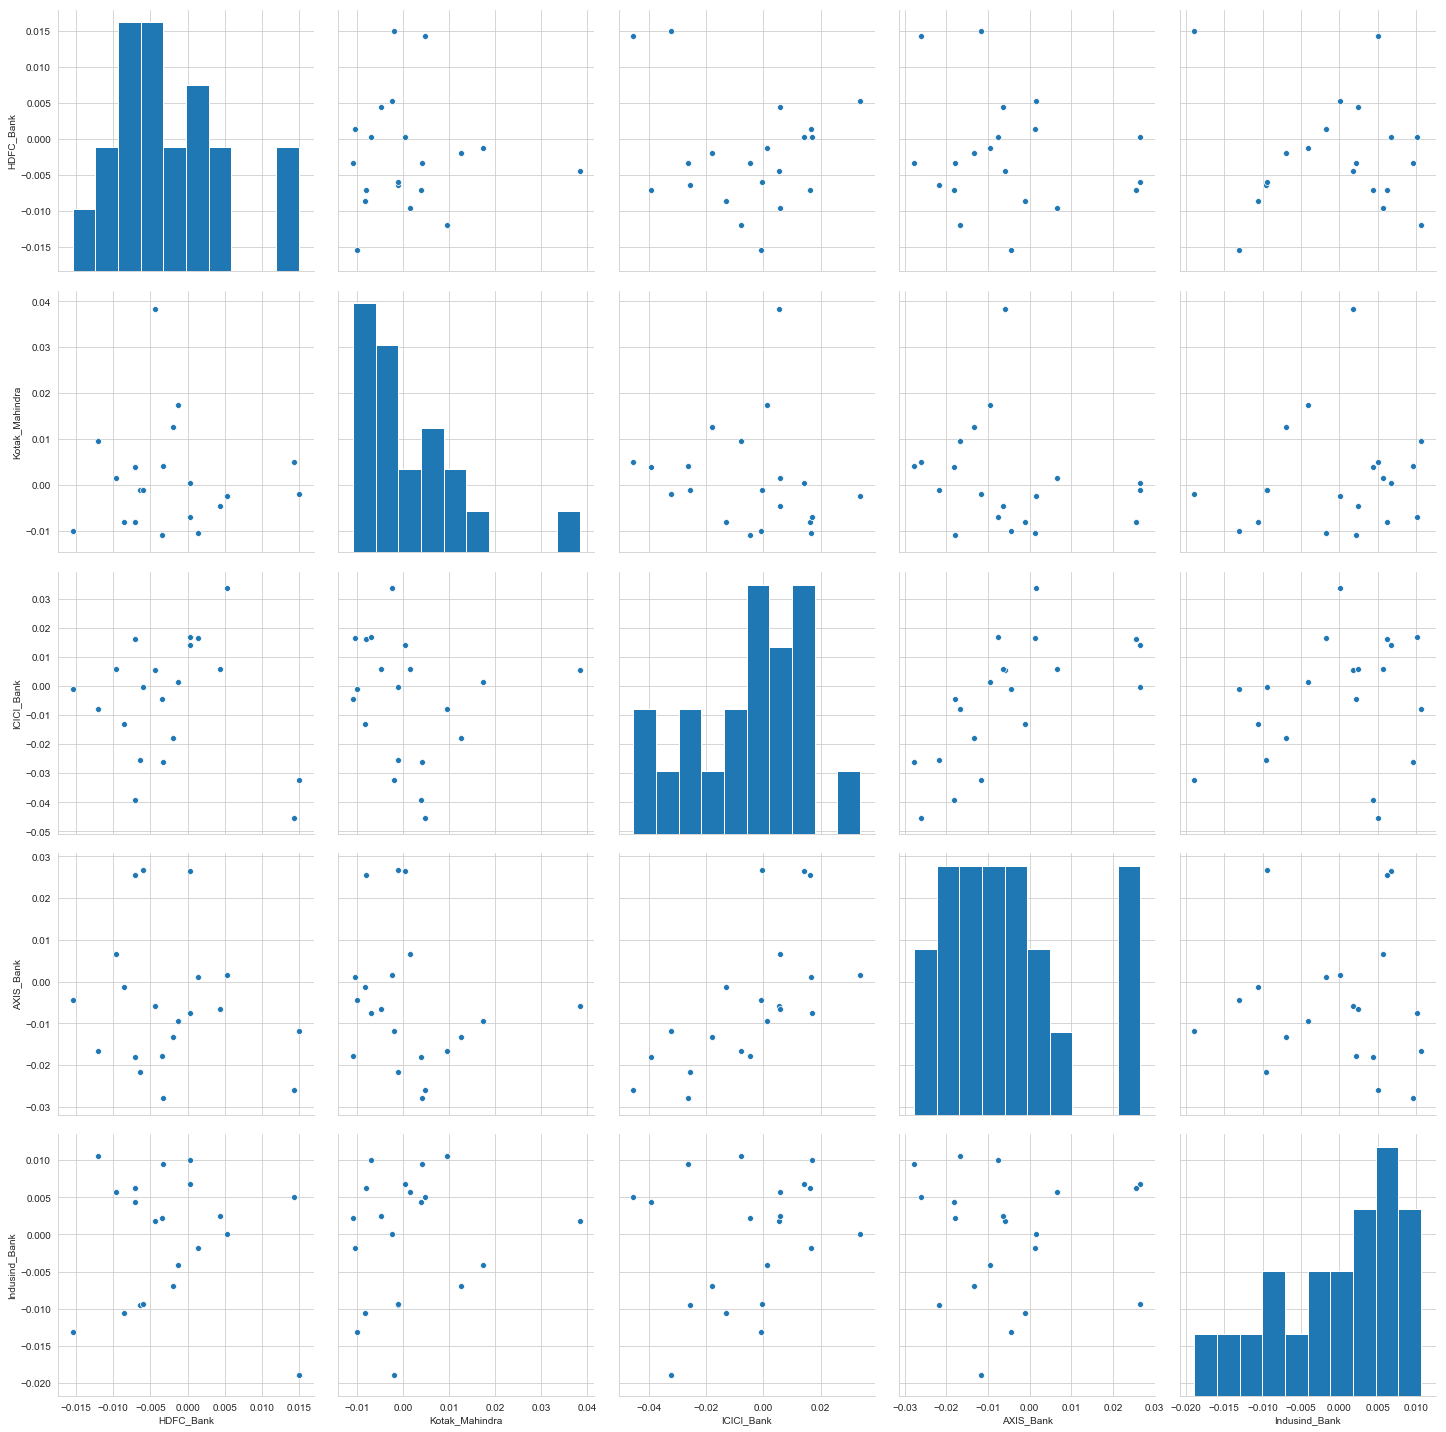

In [46]:
sns.pairplot(rets.dropna(),height=4)
#pt.savefig("PairPlotting")

# Correlation Matrix

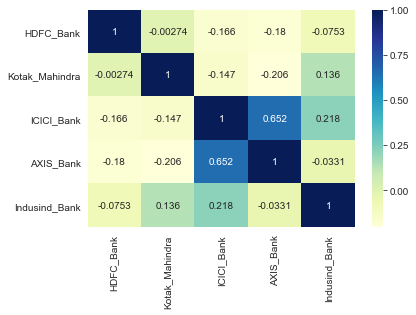

In [47]:
sns.heatmap(rets.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

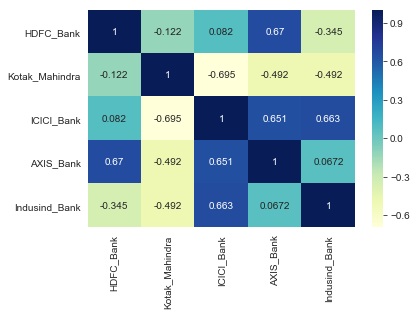

In [48]:
sns.heatmap(close_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<H2> Risk Return Analysis

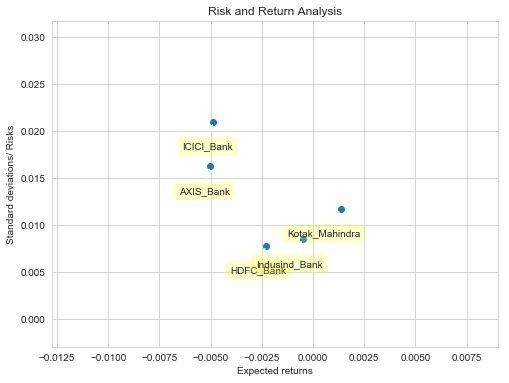

In [49]:
fig, ax = pt.subplots(figsize=(8,6))
pt.scatter(rets.mean(), rets.std())
pt.xlabel('Expected returns')
pt.ylabel('Standard deviations/ Risks')
pt.title('Risk and Return Analysis')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    pt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'top',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

#pt.savefig("5 Risk and Return Analysis.png")


<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [50]:
import numpy as np
import statsmodels.api as sm
X=close_df[['HDFC_Bank','ICICI_Bank','AXIS_Bank','Indusind_Bank']]
X = sm.add_constant(X)
y=close_df['Kotak_Mahindra']
model = sm.OLS(y,X,missing='drop')             #drop rows with missing values
result = model.fit()                           #adjusts the data to model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Kotak_Mahindra   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     3.958
Date:                Tue, 31 Jul 2018   Prob (F-statistic):             0.0203
Time:                        08:19:48   Log-Likelihood:                -96.755
No. Observations:                  21   AIC:                             203.5
Df Residuals:                      16   BIC:                             208.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2519.9039    865.357      2.912      0.010     685.430    4354.378
HDFC_Bank        -0.0663      0.285     -0.233      0.819      -0.670       0.538
ICICI_Bank       -1.6423      1.433     -1.146      0.269      -4.679       1.395
AXIS_Bank        -0.2415      1.053     -0.229      0.822      -2.475       1.992
Indusind_Bank    -0.2279      0.407     -0.560      0.583      -1.091       0.635
==============================================================================
Omnibus:                        3.295   Durbin-Watson:                   0.554
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                1.551
Skew:                          -0.314   Prob(JB):                        0.460
Kurtosis:                       1.826   Cond. No.                     4.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Plotting the Predicted values and actual values to the model

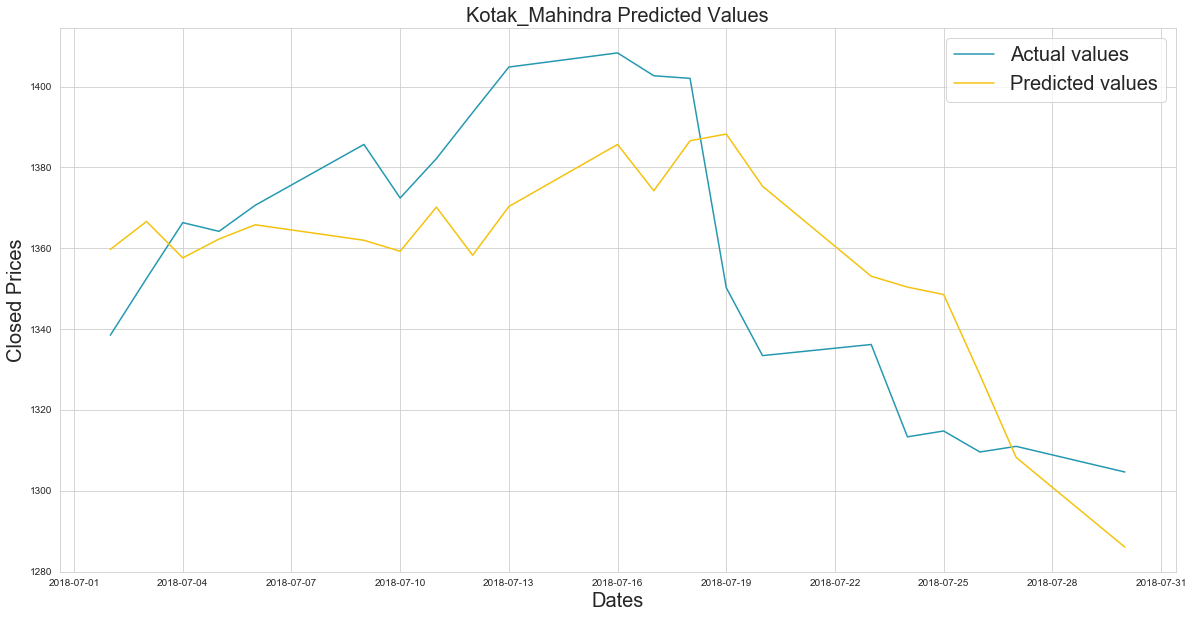

In [51]:
fig, ax = pt.subplots(figsize=(20,10))
ax.plot(y, color="#2498B0", label="Actual values")
ax.plot(result.fittedvalues, color='#f4c20d', label="Predicted values")
ax.set_xlabel('Dates',size=20)
ax.set_ylabel('Closed Prices',size=20)
ax.set_title('Kotak_Mahindra Predicted Values',size=20)
p,q = ax.get_legend_handles_labels()
ax.legend(p, q)
pt.legend(prop={'size':20})
